In [ ]:
# GENYZ TEAM
# Aleta Edna Jessalyn 
# Angelina Wahyuni 
# Keisya Andretta
# Infall Syafalni

# reusing the nmos and pmos primitives from gLayout

2025-09-23 08:17:07.790 | INFO     | gdsfactory.pdk:activate:337 - 'gf180' PDK is now active
/headless/conda-env/miniconda3/envs/GLdev/lib/python3.10/site-packages/gdsfactory/show.py:40: UserWarning: Unnamed cells, 10 in 'LPF'
  gdspath = component.write_gds(
2025-09-23 08:18:26.589 | WARNING  | gdsfactory.klive:show:48 - Could not connect to klive server. Is klayout open and klive plugin installed?


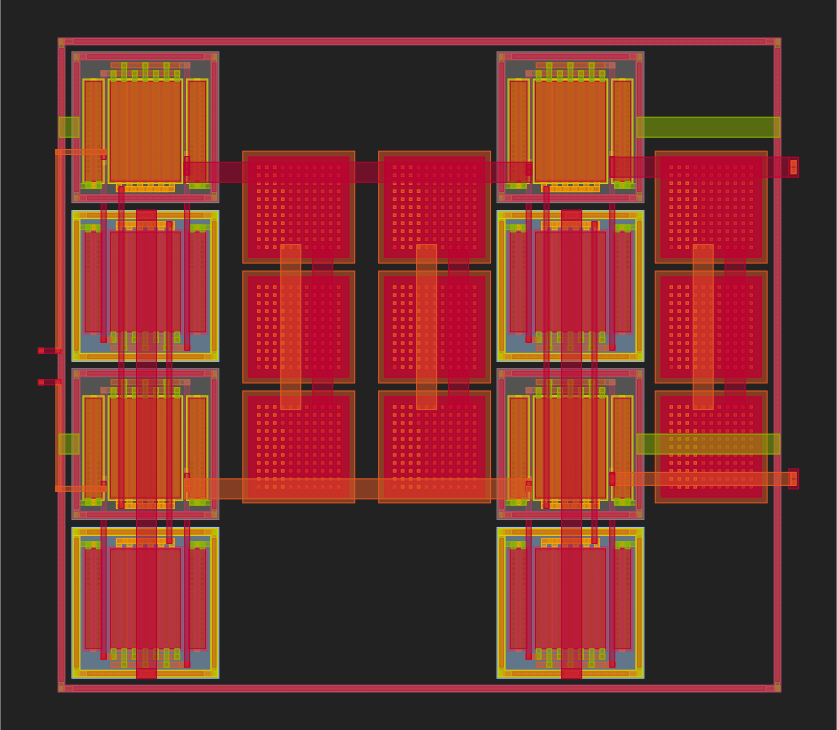

In [2]:
import os
import subprocess

# Run a shell, source .bashrc, then printenv
cmd = 'bash -c "source ~/.bashrc && printenv"'
result = subprocess.run(cmd, shell=True, text=True, capture_output=True)
env_vars = {}
for line in result.stdout.splitlines():
    if '=' in line:
        key, value = line.split('=', 1)
        env_vars[key] = value

# Now, update os.environ with these
os.environ.update(env_vars)

import gdstk
import svgutils.transform as sg
import IPython.display
from IPython.display import clear_output
import ipywidgets as widgets

# Redirect all outputs here
hide = widgets.Output()

def display_gds(gds_file,path,scale = 3):
  
  # Generate an SVG image
  top_level_cell = gdstk.read_gds(gds_file).top_level()[0]
  top_level_cell.write_svg(os.path.join(path,'out.svg'))
    
  # Scale the image for displaying
  fig = sg.fromfile(os.path.join(path,'out.svg'))
  fig.set_size((str(float(fig.width) * scale), str(float(fig.height) * scale)))
  fig.save(os.path.join(path,'out.svg'))

  # Display the image
  IPython.display.display(IPython.display.SVG(os.path.join(path,'out.svg')))
  os.remove(os.path.join(path,'out.gds'))

def display_component(component,path,scale = 3):
  # Save to a GDS file
  with hide:
    component.write_gds(os.path.join(path,'out.gds'))
  display_gds(os.path.join(path,'out.gds'),path,scale)

from glayout import MappedPDK, sky130 , gf180
from gdsfactory.cell import cell
from gdsfactory import Component
from gdsfactory.components import text_freetype, rectangle
from glayout import nmos, pmos
from glayout import via_stack, via_array
from glayout import rename_ports_by_orientation
from glayout import tapring
from glayout.util.comp_utils import evaluate_bbox, prec_center, prec_ref_center, align_comp_to_port
from glayout.util.port_utils import add_ports_perimeter,print_ports
from glayout.util.snap_to_grid import component_snap_to_grid
from glayout.spice.netlist import Netlist
from glayout.routing.straight_route import straight_route
from glayout.routing.c_route import c_route
from glayout.routing.L_route import L_route

import sys
from pathlib import Path
sys.path.append(os.path.abspath("../../TGSW"))

from my_TGSW import tgswitch
from glayout.primitives.mimcap import mimcap

LPF_switch_config={
        "pdk": gf180, # pdk to use
        "placement" : "vertical", # the two fets can be placed either vertically or horizontally
        "width": (10,10), # width of the input fet and feedback fet respectively.
        "length": (0.5,0.5), # length of the input fet and feedback fet respectively. None refers to the min length in the pdk.
        "fingers": (6,6), # no. of fingers of the input fet and feedback fet respectively.
        "multipliers": (1,1), #no. of multipliers of the input fet and feedback fet respectively.
        "dummy_1": (True,True), # dummy pattern for input fet (left,right)
        "dummy_2": (True,True), # dummy pattern for the feedback fet (left,right)
        "tie_layers1": ("met2","met1"), #tapring metal layers for output fet
        "tie_layers2": ("met2","met1"), #tapring metal layers for output fet
        "sd_rmult":1, # thickness of the sd metal layer.
}
Top_Level = Component(name="LPF")
pdk=LPF_switch_config["pdk"]
pdk.activate()

width=LPF_switch_config["width"]
length=LPF_switch_config["length"]
fingers=LPF_switch_config["fingers"]
multipliers=LPF_switch_config["multipliers"]

dummy_1=LPF_switch_config["dummy_1"]
dummy_2=LPF_switch_config["dummy_2"]
tie_layers1=LPF_switch_config["tie_layers1"]
tie_layers2=LPF_switch_config["tie_layers2"]
sd_rmult=LPF_switch_config["sd_rmult"]

SW1 = tgswitch(pdk, "vertical_inv",(width[0],width[1]),(length[0],length[1]),(fingers[0],fingers[1]),(multipliers[0],multipliers[1]))
SW2 = tgswitch(pdk, "vertical_inv",(width[0],width[1]),(length[0],length[1]),(fingers[0],fingers[1]),(multipliers[0],multipliers[1]))
SW3 = tgswitch(pdk, "vertical_inv",(width[0],width[1]),(length[0],length[1]),(fingers[0],fingers[1]),(multipliers[0],multipliers[1]))
SW4 = tgswitch(pdk, "vertical_inv",(width[0],width[1]),(length[0],length[1]),(fingers[0],fingers[1]),(multipliers[0],multipliers[1]))
SW1_ref = Top_Level << SW1
SW2_ref = Top_Level << SW2
SW3_ref = Top_Level << SW3
SW4_ref = Top_Level << SW4

#component = Top_Level.flatten()
#component.name="LPF"

#drc_result = gf180.drc_magic(component, component.name)

CM1 = mimcap(pdk, size=[10,10])
CM2 = mimcap(pdk, size=[10,10])
CM3 = mimcap(pdk, size=[10,10])
CM4 = mimcap(pdk, size=[10,10])
CM5 = mimcap(pdk, size=[10,10])
CM6 = mimcap(pdk, size=[10,10])
CM7 = mimcap(pdk, size=[10,10])
CM8 = mimcap(pdk, size=[10,10])
CM9 = mimcap(pdk, size=[10,10])
CM1_ref = Top_Level << CM1
CM2_ref = Top_Level << CM2
CM3_ref = Top_Level << CM3
CM4_ref = Top_Level << CM4
CM5_ref = Top_Level << CM5
CM6_ref = Top_Level << CM6
CM7_ref = Top_Level << CM7
CM8_ref = Top_Level << CM8
CM9_ref = Top_Level << CM9

SW1_ref.name = "SW1"
SW2_ref.name = "SW2"
SW3_ref.name = "SW3"
SW4_ref.name = "SW4"
CM1_ref.name = "CM1"
CM2_ref.name = "CM2"
CM3_ref.name = "CM3"
CM4_ref.name = "CM4"
CM5_ref.name = "CM5"
CM6_ref.name = "CM6"
CM7_ref.name = "CM7"
CM8_ref.name = "CM8"
CM9_ref.name = "CM9"

shift_y = -8
shift_x = 6

# Switches 1,3 (left) 2,4 (Right)

SW3_ref.movey(SW1_ref.ymin - pdk.get_grule("met3")["min_width"] + shift_y)
ref_dimensions = evaluate_bbox(CM1_ref)

# Cap Left
CM1_ref.movex(SW1_ref.xmax - shift_y ).movey(destination=shift_y)
CM4_ref.move(CM1_ref.center).movey(-ref_dimensions[1]- pdk.util_max_metal_seperation()-0.5)
CM7_ref.move(CM4_ref.center).movey(-ref_dimensions[1]- pdk.util_max_metal_seperation()-0.5)
#CM4_ref.movex(SW1_ref.xmax*1.85).movey(destination=-22.8)
#CM7_ref.movex(SW1_ref.xmax*1.85).movey(destination=-37.6)

# Cap Center
CM2_ref.movex(CM1_ref.xmax - shift_y ).movey(destination=shift_y)
CM5_ref.move(CM2_ref.center).movey(-ref_dimensions[1]- pdk.util_max_metal_seperation()-0.5)
CM8_ref.move(CM5_ref.center).movey(-ref_dimensions[1]- pdk.util_max_metal_seperation()-0.5)

SW2_ref.movex(CM2_ref.xmax - shift_y )
SW4_ref.movey(SW1_ref.ymin - pdk.get_grule("met3")["min_width"] + shift_y).movex(CM2_ref.xmax - shift_y)

# Cap Right
CM3_ref.movex(SW2_ref.xmax*1.135).movey(destination=shift_y)
CM6_ref.move(CM3_ref.center).movey(-ref_dimensions[1]- pdk.util_max_metal_seperation()-0.5)
CM9_ref.move(CM6_ref.center).movey(-ref_dimensions[1]- pdk.util_max_metal_seperation()-0.5)

# ==================================================================
# TAPRING FOR WHOLE TOP_LEVEL BEFORE ROUTING AND VIA
# ==================================================================
tap_ring = tapring(pdk, enclosed_rectangle=evaluate_bbox(Top_Level.flatten(), padding = 2*(pdk.get_grule("nwell", "active_diff")["min_enclosure"])))
shift_amount = -prec_center(Top_Level.flatten())[0]
shift_amount_y = -prec_center(Top_Level.flatten())[1]
tring_ref = Top_Level << tap_ring
tring_ref.movex(destination=shift_amount).movey(destination=shift_amount_y)

# ==================================================================
# ROUTING AND VIA
# ===================================================================
# Padding untuk nwell
viam2m3 = via_stack(pdk, "met2", "met3", centered=True) #met2 is the bottom layer. met3 is the top layer.
viam1m2 = via_stack(pdk, "met1", "met2", centered=True) 
viam3m4 = via_stack(pdk, "met3", "met4", centered=True)

# INPUT PART
# VIA FOR INPUT OUTSIDE GUARD-RING
vinp_end_via = Top_Level << viam2m3
vinn_end_via = Top_Level << viam2m3
vinp = Top_Level << viam2m3
vinn = Top_Level << viam2m3
vinp_end_via.move(SW1_ref.ports["P_tie_N_top_met_W"].center).movex(-2).movey(pdk.util_max_metal_seperation()*2)
vinn_end_via.move(vinp_end_via.center).movey(-pdk.util_max_metal_seperation()*3-2.25)
vinp.move(vinp_end_via.ports["top_met_E"].center).movex(-2)
vinn.move(vinn_end_via.ports["top_met_E"].center).movex(-2)
# ROUTE FOR INPUT
Top_Level << straight_route(pdk, vinp_end_via.ports["top_met_E"], vinp.ports["top_met_W"])
Top_Level << straight_route(pdk, vinn_end_via.ports["top_met_E"], vinn.ports["top_met_W"])

nmos_left_gate_start_via = Top_Level << viam2m3
nmos_left_gate_end_via = Top_Level << viam2m3
nmos_right_gate_start_via = Top_Level << viam2m3
nmos_right_gate_end_via = Top_Level << viam2m3

nmos_left_gate_start_via.move(SW1_ref.ports["N_gate_W"].center).movex(0.5)
nmos_left_gate_end_via.move(SW3_ref.ports["N_gate_W"].center).movex(0.5)
nmos_right_gate_start_via.move(SW2_ref.ports["N_gate_W"].center).movex(0.5)
nmos_right_gate_end_via.move(SW4_ref.ports["N_gate_W"].center).movex(0.5)

pmos_left_gate_start_via = Top_Level << viam2m3
pmos_left_gate_end_via = Top_Level << viam2m3
pmos_right_gate_start_via = Top_Level << viam2m3
pmos_right_gate_end_via = Top_Level << viam2m3

pmos_left_gate_start_via.move(SW1_ref.ports["P_gate_E"].center).movex(-0.5)
pmos_left_gate_end_via.move(SW3_ref.ports["P_gate_E"].center).movex(-0.5)
pmos_right_gate_start_via.move(SW2_ref.ports["P_gate_E"].center).movex(-0.5)
pmos_right_gate_end_via.move(SW4_ref.ports["P_gate_E"].center).movex(-0.5)

#nmos_left_end_via = Top_Level << viam2m3
#nmos_right_end_via = Top_Level << viam2m3
#nmos_left_end_via.movey(-58.05).movex(-2.5) # Free y coordinate, outside guard ring for Clk
#nmos_right_end_via.movey(-58.05).movex(41.5) # Free y coordinate, outside guard ring for Clk

#pmos_left_end_via = Top_Level << viam2m3
#pmos_right_end_via = Top_Level << viam2m3
#pmos_left_end_via.movey(-58.05).movex(2.5) # Free y coordinate, outside guard ring for Clk
#pmos_right_end_via.movey(-58.05).movex(36.5) # Free y coordinate, outside guard ring for Clk

# OUTPUT FROM RIGHT CAP
viaarray1x2 = via_array(pdk, "met2", "met3", (1,2))
mimcap4_start_top1_via = Top_Level << viaarray1x2
mimcap4_start_bot1_via = Top_Level << viaarray1x2
mimcap4_start_top1_via.move(CM3_ref.ports["array_row10_col10_top_met_E"].center).movex(4)
mimcap4_start_bot1_via.move(CM9_ref.ports["array_row1_col10_top_met_E"].center).movex(4)
#mimcap4_start_top1_via.move(CM3_ref.ports["array_row10_col10_top_met_E"].center).movex(4)
#mimcap4_start_bot1_via.move(CM9_ref.ports["array_row1_col10_top_met_E"].center).movex(4)

#mimcap4_start_top1_via.movey(-4).movex(63) # Free y coordinate, bcs Lroute would adapt
#mimcap4_start_bot1_via.movey(-37.8).movex(63) # Free y coordinate, bcs Lroute would adapt

Top_Level << L_route(pdk, SW2_ref.ports["P_source_top_met_S"], mimcap4_start_top1_via.ports["top_met_W"])
Top_Level << L_route(pdk, SW4_ref.ports["P_source_top_met_S"], mimcap4_start_bot1_via.ports["bottom_lay_W"])

# Routing for CLK
Top_Level << straight_route(pdk, nmos_left_gate_start_via.ports["top_met_N"], nmos_left_gate_end_via.ports["top_met_S"])
Top_Level << straight_route(pdk, nmos_right_gate_start_via.ports["top_met_N"], nmos_right_gate_end_via.ports["top_met_S"])
# Routing for CLKinv
Top_Level << straight_route(pdk, pmos_left_gate_start_via.ports["top_met_N"], pmos_left_gate_end_via.ports["top_met_S"])
Top_Level << straight_route(pdk, pmos_right_gate_start_via.ports["top_met_N"], pmos_right_gate_end_via.ports["top_met_S"])

Top_Level << straight_route(pdk, CM7_ref.ports["array_row10_col8_top_met_S"], CM1_ref.ports["array_row0_col8_top_met_N"], width=2)
Top_Level << straight_route(pdk, CM7_ref.ports["array_row10_col4_bottom_met_S"], CM1_ref.ports["array_row0_col4_bottom_met_N"], width=2)

Top_Level << straight_route(pdk, CM9_ref.ports["array_row10_col8_top_met_S"], CM3_ref.ports["array_row0_col8_top_met_N"], width=2)
Top_Level << straight_route(pdk, CM9_ref.ports["array_row10_col4_bottom_met_S"], CM3_ref.ports["array_row0_col4_bottom_met_N"], width=2)

Top_Level << straight_route(pdk, CM8_ref.ports["array_row10_col8_top_met_S"], CM2_ref.ports["array_row0_col8_top_met_N"], width=2)
Top_Level << straight_route(pdk, CM8_ref.ports["array_row10_col4_bottom_met_S"], CM2_ref.ports["array_row0_col4_bottom_met_N"], width=2)

Top_Level << c_route(pdk, SW1_ref.ports["P_drain_top_met_N"], vinp_end_via.ports["bottom_met_N"],cglayer="met2")
Top_Level << c_route(pdk, SW3_ref.ports["P_drain_top_met_S"], vinn_end_via.ports["bottom_met_S"],cglayer="met2")

Top_Level << c_route(pdk, SW1_ref.ports["P_source_top_met_S"], SW2_ref.ports["P_drain_top_met_S"],cglayer="met3", cwidth=2)
Top_Level << c_route(pdk, SW3_ref.ports["P_source_top_met_S"], SW4_ref.ports["P_drain_top_met_S"],cglayer="met2", cwidth=2)

# ===================================================================
# VDD AND VSS WAY
# ===================================================================
viaarray = via_array(pdk, "met2", "met3", (2,1))

VDD1_start_via = Top_Level << viaarray
VDD1_end_via = Top_Level << viaarray
VDD2_start_via = Top_Level << viaarray
VDD2_end_via = Top_Level << viaarray

VDD1_start_via.move(SW1_ref.ports["P_tie_S_top_met_E"].center).movex(-SW1_ref.xmax+0.75)
VDD1_end_via.move(SW3_ref.ports["P_tie_N_top_met_E"].center).movex(-SW1_ref.xmax+0.75)
VDD2_start_via.move(SW2_ref.ports["P_tie_S_top_met_E"].center).movex(-SW1_ref.xmax+0.75)
VDD2_end_via.move(SW4_ref.ports["P_tie_N_top_met_E"].center).movex(-SW1_ref.xmax+0.75)

Top_Level << straight_route(pdk, VDD1_start_via.ports["top_met_N"], VDD1_end_via.ports["top_met_S"], width=2)
Top_Level << straight_route(pdk, VDD2_start_via.ports["top_met_N"], VDD2_end_via.ports["top_met_S"], width=2)

#VSS1_start_via = Top_Level << viaarray
#VSS1_end_via = Top_Level << viaarray
#VSS2_start_via = Top_Level << viaarray
#VSS2_end_via = Top_Level << viaarray

#VSS1_start_via.move(SW1_ref.ports["N_tie_N_top_met_S"].center).movey(0.3)
#VSS1_end_via.move(SW3_ref.ports["N_tie_S_top_met_S"].center).movey(0.3)
#VSS2_start_via.move(SW2_ref.ports["N_tie_N_top_met_S"].center).movey(0.3)
#VSS2_end_via.move(SW4_ref.ports["N_tie_S_top_met_S"].center).movey(0.3)

Top_Level << straight_route(pdk, SW1_ref.ports["N_tie_W_top_met_E"], tring_ref.ports["W_top_met_W"], width=2)
Top_Level << straight_route(pdk, SW3_ref.ports["N_tie_W_top_met_E"], tring_ref.ports["W_top_met_W"], width=2)
Top_Level << straight_route(pdk, SW2_ref.ports["N_tie_E_top_met_W"], tring_ref.ports["E_top_met_E"], width=2)
Top_Level << straight_route(pdk, SW4_ref.ports["N_tie_E_top_met_W"], tring_ref.ports["E_top_met_E"], width=2)

Top_Level.show()
display_component(Top_Level, scale = 1,path="../../")

In [3]:
Top_Level.add_ports(vinp.get_ports_list(), prefix="VINP_")
Top_Level.add_ports(vinn.get_ports_list(), prefix="VINN_")
Top_Level.add_ports(mimcap4_start_top1_via.get_ports_list(), prefix="VOUTP_")
Top_Level.add_ports(mimcap4_start_bot1_via.get_ports_list(), prefix="VOUTN_")

Top_Level.add_ports(pmos_left_gate_start_via.get_ports_list(), prefix="CLKA_TOP_")
Top_Level.add_ports(nmos_left_gate_start_via.get_ports_list(), prefix="CLKAINV_TOP_")
Top_Level.add_ports(pmos_right_gate_start_via.get_ports_list(), prefix="CLKB_TOP_")
Top_Level.add_ports(nmos_right_gate_start_via.get_ports_list(), prefix="CLKBINV_TOP_")

Top_Level.add_ports(pmos_left_gate_end_via.get_ports_list(), prefix="CLKA_BOTTOM_")
Top_Level.add_ports(nmos_left_gate_end_via.get_ports_list(), prefix="CLKAINV_BOTTOM_")
Top_Level.add_ports(pmos_right_gate_end_via.get_ports_list(), prefix="CLKB_BOTTOM_")
Top_Level.add_ports(nmos_right_gate_end_via.get_ports_list(), prefix="CLKBINV_BOTTOM_")

Top_Level.add_ports(VDD1_start_via.get_ports_list(), prefix="VDDL_TOP_")
Top_Level.add_ports(VDD2_start_via.get_ports_list(), prefix="VDDR_TOP_")
Top_Level.add_ports(VDD1_end_via.get_ports_list(), prefix="VDDL_BOTTOM_")
Top_Level.add_ports(VDD2_end_via.get_ports_list(), prefix="VDDR_BOTTOM_")

Top_Level.add_ports(tring_ref.get_ports_list(), prefix="VSSring_")

component = component_snap_to_grid(rename_ports_by_orientation(Top_Level))

psize=(0.5,0.5)
# list that will contain all port/comp info
move_info = list()
# create labels and append to info list

2025-09-23 08:18:30.722 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'out_LPF.gds'
2025-09-23 08:18:30.769 | WARNING  | gdsfactory.klive:show:48 - Could not connect to klive server. Is klayout open and klive plugin installed?


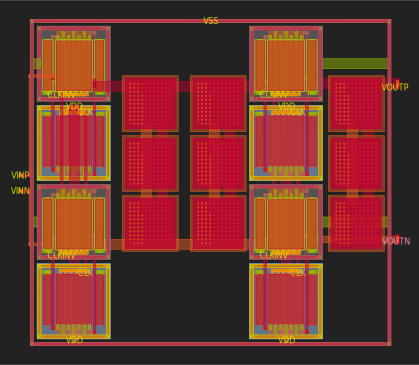

In [4]:
# --- VSS ---
vsslabel = rectangle(layer=pdk.get_glayer("met3_pin"), size=psize, centered=True).copy()
vsslabel.add_label(text="VSS", layer=pdk.get_glayer("met3_label"))
move_info.append((vsslabel, component.ports["VSSring_N_top_met_N"], None))

# --- VDD ---
vddlabel = rectangle(layer=pdk.get_glayer("met3_pin"), size=psize, centered=True).copy()
vddlabel.add_label(text="VDD", layer=pdk.get_glayer("met3_label"))
move_info.append((vddlabel, component.ports["VDDL_TOP_top_met_N"], None))
move_info.append((vddlabel, component.ports["VDDR_TOP_top_met_N"], None))
move_info.append((vddlabel, component.ports["VDDL_BOTTOM_top_met_S"], None))
move_info.append((vddlabel, component.ports["VDDR_BOTTOM_top_met_S"], None))

# --- Outputs ---
outputplabel = rectangle(layer=pdk.get_glayer("met3_pin"), size=psize, centered=True).copy()
outputplabel.add_label(text="VOUTP", layer=pdk.get_glayer("met3_label"))
move_info.append((outputplabel, component.ports["VOUTP_top_met_W"], None))

outputnlabel = rectangle(layer=pdk.get_glayer("met2_pin"), size=psize, centered=True).copy()
outputnlabel.add_label(text="VOUTN", layer=pdk.get_glayer("met2_label"))
move_info.append((outputnlabel, component.ports["VOUTN_bottom_lay_W"], None))

# --- Inputs ---
inputplabel = rectangle(layer=pdk.get_glayer("met3_pin"), size=psize, centered=True).copy()
inputplabel.add_label(text="VINP", layer=pdk.get_glayer("met3_label"))
move_info.append((inputplabel, component.ports["VINP_top_met_W"], None))

inputnlabel = rectangle(layer=pdk.get_glayer("met3_pin"), size=psize, centered=True).copy()
inputnlabel.add_label(text="VINN", layer=pdk.get_glayer("met3_label"))
move_info.append((inputnlabel, component.ports["VINN_top_met_W"], None))

# --- Clocks ---
clklabel = rectangle(layer=pdk.get_glayer("met3_pin"), size=psize, centered=True).copy()
clklabel.add_label(text="CLK", layer=pdk.get_glayer("met3_label"))
move_info.append((clklabel, component.ports["CLKA_TOP_top_met_N"], None))
move_info.append((clklabel, component.ports["CLKB_TOP_top_met_N"], None))
move_info.append((clklabel, component.ports["CLKA_BOTTOM_top_met_S"], None))
move_info.append((clklabel, component.ports["CLKB_BOTTOM_top_met_S"], None))

clkinvlabel = rectangle(layer=pdk.get_glayer("met3_pin"), size=psize, centered=True).copy()
clkinvlabel.add_label(text="CLKINV", layer=pdk.get_glayer("met3_label"))
move_info.append((clkinvlabel, component.ports["CLKAINV_TOP_top_met_N"], None))
move_info.append((clkinvlabel, component.ports["CLKBINV_TOP_top_met_N"], None))
move_info.append((clkinvlabel, component.ports["CLKAINV_BOTTOM_top_met_S"], None))
move_info.append((clkinvlabel, component.ports["CLKBINV_BOTTOM_top_met_S"], None))

for comp, prt, alignment in move_info:
    alignment = ('c','b') if alignment is None else alignment
    compref = align_comp_to_port(comp, prt, alignment=alignment)
    Top_Level.add(compref)


# --- Flatten after everything is added ---
component = Top_Level.flatten()
component.name = "LPF_1"

# --- Write & Display ---
component.write_gds('out_LPF.gds')
component.show()
display_component(component, scale=0.5, path="../../")
# component.pprint_ports()


In [4]:
component.name="LPF_"
Top_Level.name ' 
drc_result = gf180.drc_magic(component, component.name)

2025-09-08 14:34:16.124 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to '/tmp/tmplwuddm64/LPF_.gds'


using default pdk_root
Defaulting to stale magic_commands.tcl

Magic 8.3 revision 528 - Compiled on Wed Jun 18 09:45:25 PM CEST 2025.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology gf180mcuD ...
10 Magic internal units = 1 Lambda
Input style import: scaleFactor=10, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    obsactive mvobsactive filldiff fillpoly m1hole obsm1 fillm1 obsv1 m2hole obsm2 fillm2 obsv2 m3hole obsm3 fillm3 m4hole obsm4 fillm4 m5hole obsm5 fillm5 glass fillblock lvstext obscomment 
Scaled tech values by 10 / 1 to match internal grid scaling
Loading gf180mcuD Device Generator Menu ...
Loading "/tmp/tmplwuddm64/magic_commands.tcl" from command line.
Library written using GDS-II Release 6.0
Library name: library
Reading "LPF_".
[INFO]: Loading LPF_

Loading DRC CIF style.
No errors found.

In [5]:
inv_code_string = """
from glayout import MappedPDK, sky130 , gf180
#from gdsfactory.cell import cell
from gdsfactory import Component
from gdsfactory.components import text_freetype, rectangle
from glayout import nmos, pmos
from glayout import via_stack, via_array
from glayout import rename_ports_by_orientation
from glayout import tapring
from glayout.util.comp_utils import evaluate_bbox, prec_center, prec_ref_center, align_comp_to_port
from glayout.util.port_utils import add_ports_perimeter,print_ports
from glayout.util.snap_to_grid import component_snap_to_grid
from glayout.spice.netlist import Netlist
from glayout.routing.straight_route import straight_route
from glayout.routing.c_route import c_route
from glayout.routing.L_route import L_route
from glayout.primitives.mimcap import mimcap

import os
import subprocess

# Run a shell, source .bashrc, then printenv
cmd = 'bash -c "source ~/.bashrc && printenv"'
result = subprocess.run(cmd, shell=True, text=True, capture_output=True)
env_vars = {}
for line in result.stdout.splitlines():
    if '=' in line:
        key, value = line.split('=', 1)
        env_vars[key] = value

# Now, update os.environ with these
os.environ.update(env_vars)

import sys
from pathlib import Path
sys.path.append(os.path.abspath("../../TGSW"))

from my_TGSW import tgswitch

def add_LPF_labels(
    LPF_in: Component,
    pdk: MappedPDK,
    ) -> Component:
    
    LPF_in.unlock()

    psize=(0.5,0.5)
    # list that will contain all port/comp info
    move_info = list()
    # create labels and append to info list

    # VSS
    vsslabel = rectangle(layer=pdk.get_glayer("met3_pin"),size=psize,centered=True).copy()
    vsslabel.add_label(text="VSS",layer=pdk.get_glayer("met3_label"))
    move_info.append((vsslabel,LPF_in.ports["VSSring_N_top_met_N"],None))
    #gnd_ref = top_level << gndlabel;

    #suply
    vddlabel = rectangle(layer=pdk.get_glayer("met3_pin"),size=psize,centered=True).copy()
    vddlabel.add_label(text="VDD",layer=pdk.get_glayer("met3_pin"))
    move_info.append((vddlabel,LPF_in.ports["VDDL_TOP_top_met_N"],None))
    move_info.append((vddlabel,LPF_in.ports["VDDR_TOP_top_met_N"],None))
    move_info.append((vddlabel,LPF_in.ports["VDDL_BOTTOM_top_met_S"],None))
    move_info.append((vddlabel,LPF_in.ports["VDDR_BOTTOM_top_met_S"],None))
    # output
    outputplabel = rectangle(layer=pdk.get_glayer("met3_pin"),size=psize,centered=True).copy()
    outputplabel.add_label(text="VOUTP",layer=pdk.get_glayer("met3_pin"))
    move_info.append((outputplabel,LPF_in.ports["VOUTP__top_met_W"],None))
    outputnlabel = rectangle(layer=pdk.get_glayer("met2_pin"),size=psize,centered=True).copy()
    outputnlabel.add_label(text="VOUTN",layer=pdk.get_glayer("met2_pin"))
    move_info.append((outputnlabel,LPF_in.ports["VOUTN__bottom_met_W"],None))
    #op_ref = top_level << outputlabel;

    # input
    inputplabel = rectangle(layer=pdk.get_glayer("met3_pin"),size=psize,centered=True).copy()
    inputplabel.add_label(text="VINP",layer=pdk.get_glayer("met3_pin"))
    move_info.append((inputplabel,LPF_in.ports["VINP__top_met_W"], None))
    inputnlabel = rectangle(layer=pdk.get_glayer("met3_pin"),size=psize,centered=True).copy()
    inputnlabel.add_label(text="VINN",layer=pdk.get_glayer("met3_pin"))
    move_info.append((inputnlabel,LPF_in.ports["VINN__top_met_W"], None))
    #ip_ref = top_level << inputlabel;

    # CLK
    clklabel = rectangle(layer=pdk.get_glayer("met3_pin"),size=psize,centered=True).copy()
    clklabel.add_label(text="CLK",layer=pdk.get_glayer("met3_pin"))
    move_info.append((clklabel,LPF_in.ports["CLKA_TOP_top_met_N"], None))
    move_info.append((clklabel,LPF_in.ports["CLKB_TOP_top_met_N"], None))
    move_info.append((clklabel,LPF_in.ports["CLKA_BOTTOM_top_met_S"], None))
    move_info.append((clklabel,LPF_in.ports["CLKB_BOTTOM_top_met_S"], None))
    clkinvlabel = rectangle(layer=pdk.get_glayer("met3_pin"),size=psize,centered=True).copy()
    clkinvlabel.add_label(text="CLKINV",layer=pdk.get_glayer("met3_pin"))
    move_info.append((clkinvlabel,LPF_in.ports["CLKAINV_TOP_top_met_N"], None))
    move_info.append((clkinvlabel,LPF_in.ports["CLKBINV_TOP_top_met_N"], None))
    move_info.append((clkinvlabel,LPF_in.ports["CLKAINV_BOTTOM_top_met_S"], None))
    move_info.append((clkinvlabel,LPF_in.ports["CLKBINV_BOTTOM_top_met_S"], None))
    #clk_ref = top_level << clklabel;

    for comp, prt, alignment in move_info:
            alignment = ('c','b') if alignment is None else alignment
            compref = align_comp_to_port(comp, prt, alignment=alignment)
            LPF_in.add(compref)
    
    return LPF_in.flatten()

def LPF(
        pdk: MappedPDK,
        width: tuple[float,float] = (10,10),
        length: tuple[float,float] = (0.5,0,5),
        fingers: tuple[int,int] = (6,6),
        multipliers: tuple[int,int] = (1,1),
        dummy_1: tuple[bool,bool] = (True,True),
        dummy_2: tuple[bool,bool] = (True,True),
        tie_layers1: tuple[str,str] = ("met2","met1"),
        tie_layers2: tuple[str,str] = ("met2","met1"),
        sd_rmult: int=1,
        **kwargs
        ) -> Component:

    pdk.activate()
    
    #top level component
    Top_Level = Component(name="LPF")

    #four TG Switch
    SW1 = tgswitch(pdk, "vertical_inv",(width[0],width[1]),(length[0],length[1]),(fingers[0],fingers[1]),(multipliers[0],multipliers[1]))
    SW2 = tgswitch(pdk, "vertical_inv",(width[0],width[1]),(length[0],length[1]),(fingers[0],fingers[1]),(multipliers[0],multipliers[1]))
    SW3 = tgswitch(pdk, "vertical_inv",(width[0],width[1]),(length[0],length[1]),(fingers[0],fingers[1]),(multipliers[0],multipliers[1]))
    SW4 = tgswitch(pdk, "vertical_inv",(width[0],width[1]),(length[0],length[1]),(fingers[0],fingers[1]),(multipliers[0],multipliers[1]))
    SW1_ref = Top_Level << SW1
    SW2_ref = Top_Level << SW2
    SW3_ref = Top_Level << SW3
    SW4_ref = Top_Level << SW4
    CM1 = mimcap(pdk, size=[10,10])
    CM2 = mimcap(pdk, size=[10,10])
    CM3 = mimcap(pdk, size=[10,10])
    CM4 = mimcap(pdk, size=[10,10])
    CM5 = mimcap(pdk, size=[10,10])
    CM6 = mimcap(pdk, size=[10,10])
    CM7 = mimcap(pdk, size=[10,10])
    CM8 = mimcap(pdk, size=[10,10])
    CM9 = mimcap(pdk, size=[10,10])
    CM1_ref = Top_Level << CM1
    CM2_ref = Top_Level << CM2
    CM3_ref = Top_Level << CM3
    CM4_ref = Top_Level << CM4
    CM5_ref = Top_Level << CM5
    CM6_ref = Top_Level << CM6
    CM7_ref = Top_Level << CM7
    CM8_ref = Top_Level << CM8
    CM9_ref = Top_Level << CM9
    
    SW1_ref.name = "SW1"
    SW2_ref.name = "SW2"
    SW3_ref.name = "SW3"
    SW4_ref.name = "SW4"
    CM1_ref.name = "CM1"
    CM2_ref.name = "CM2"
    CM3_ref.name = "CM3"
    CM4_ref.name = "CM4"
    CM5_ref.name = "CM5"
    CM6_ref.name = "CM6"
    CM7_ref.name = "CM7"
    CM8_ref.name = "CM8"
    CM9_ref.name = "CM9"

    CM1_ref.movex(SW1_ref.xmax + 10).movey(destination=-8)
    CM3_ref.movex(CM1_ref.xmax + 10).movey(destination=-8)
    SW2_ref.movex(CM3_ref.xmax + 10)
    CM2_ref.movex(SW2_ref.xmax + 10).movey(destination=-8)
    SW3_ref.movey(SW1_ref.ymin - 10)
    SW4_ref.movey(SW1_ref.ymin - 10).movex(CM3_ref.xmax + 10)
    CM4_ref.movex(SW1_ref.xmax + 10).movey(destination=-22.8)
    CM6_ref.movex(CM4_ref.xmax + 10).movey(destination=-22.8)
    CM5_ref.movex(SW2_ref.xmax + 10).movey(destination=-22.8)
    CM7_ref.movex(SW1_ref.xmax + 10).movey(destination=-37.6)
    CM9_ref.movex(CM7_ref.xmax + 10).movey(destination=-37.6)
    CM8_ref.movex(SW2_ref.xmax + 10).movey(destination=-37.6)
    
    # Padding untuk nwell

    viam2m3 = via_stack(pdk, "met2", "met3", centered=True) #met2 is the bottom layer. met3 is the top layer.
    viam1m2 = via_stack(pdk, "met1", "met2", centered=True) 
    viam3m4 = via_stack(pdk, "met3", "met4", centered=True)
    
    vinp_end_via = Top_Level << viam2m3
    vinn_end_via = Top_Level << viam2m3
    vinp = Top_Level << viam2m3
    vinn = Top_Level << viam2m3
    
    vinp_end_via.movey(-23.3).movex(-10.175)
    vinn_end_via.movey(-26.6).movex(-10.175)
    vinp.movey(-23.3).movex(-12.175)
    vinn.movey(-26.6).movex(-12.175)

    nmos_left_gate_start_via = Top_Level << viam2m3
    nmos_left_gate_end_via = Top_Level << viam2m3
    nmos_right_gate_start_via = Top_Level << viam2m3
    nmos_right_gate_end_via = Top_Level << viam2m3
    
    nmos_left_gate_start_via.movey(-6.05).movex(-2.5)
    nmos_left_gate_end_via.movey(-39.5).movex(-2.5)
    nmos_right_gate_start_via.movey(-6.05).movex(51)
    nmos_right_gate_end_via.movey(-39.5).movex(51)
    
    pmos_left_gate_start_via = Top_Level << viam2m3
    pmos_left_gate_end_via = Top_Level << viam2m3
    pmos_right_gate_start_via = Top_Level << viam2m3
    pmos_right_gate_end_via = Top_Level << viam2m3
    
    pmos_left_gate_start_via.movey(-22.15).movex(2.5)
    pmos_left_gate_end_via.movey(-55.65).movex(2.5)
    pmos_right_gate_start_via.movey(-22.15).movex(46)
    pmos_right_gate_end_via.movey(-55.65).movex(46)
    
    nmos_left_end_via = Top_Level << viam2m3
    nmos_right_end_via = Top_Level << viam2m3
    nmos_left_end_via.movey(-58.05).movex(-2.5)
    nmos_right_end_via.movey(-58.05).movex(51)
    
    pmos_left_end_via = Top_Level << viam2m3
    pmos_right_end_via = Top_Level << viam2m3
    pmos_left_end_via.movey(-74.15).movex(2.5)
    pmos_right_end_via.movey(-74.15).movex(46)

    mimcap4_start_top1_via = Top_Level << viam2m3
    mimcap4_start_bot1_via = Top_Level << viam2m3
    mimcap4_start_top1_via.movey(-4).movex(74)
    mimcap4_start_bot1_via.movey(-37.8).movex(74)
    
    Top_Level << L_route(pdk, SW2_ref.ports["P_source_top_met_S"], mimcap4_start_top1_via.ports["top_met_W"])
    Top_Level << L_route(pdk, SW4_ref.ports["P_source_top_met_S"], mimcap4_start_bot1_via.ports["bottom_met_W"])
    
    Top_Level << straight_route(pdk, nmos_left_gate_start_via.ports["top_met_N"], nmos_left_end_via.ports["top_met_S"])
    Top_Level << straight_route(pdk, nmos_right_gate_start_via.ports["top_met_N"], nmos_right_end_via.ports["top_met_S"])
    Top_Level << straight_route(pdk, pmos_left_gate_start_via.ports["top_met_N"], pmos_left_end_via.ports["top_met_S"])
    Top_Level << straight_route(pdk, pmos_right_gate_start_via.ports["top_met_N"], pmos_right_end_via.ports["top_met_S"])

    Top_Level << straight_route(pdk, CM7_ref.ports["array_row10_col10_top_met_S"], CM1_ref.ports["array_row0_col10_top_met_N"])
    Top_Level << straight_route(pdk, CM7_ref.ports["array_row10_col0_bottom_met_S"], CM1_ref.ports["array_row0_col0_bottom_met_N"])
    
    Top_Level << straight_route(pdk, CM9_ref.ports["array_row10_col10_top_met_S"], CM3_ref.ports["array_row0_col10_top_met_N"])
    Top_Level << straight_route(pdk, CM9_ref.ports["array_row10_col0_bottom_met_S"], CM3_ref.ports["array_row0_col0_bottom_met_N"])
    
    Top_Level << straight_route(pdk, CM8_ref.ports["array_row10_col10_top_met_S"], CM2_ref.ports["array_row0_col10_top_met_N"])
    Top_Level << straight_route(pdk, CM8_ref.ports["array_row10_col0_bottom_met_S"], CM2_ref.ports["array_row0_col0_bottom_met_N"])

    Top_Level << c_route(pdk, SW1_ref.ports["P_drain_top_met_N"], vinp_end_via.ports["bottom_met_N"],cglayer="met2")
    Top_Level << c_route(pdk, SW3_ref.ports["P_drain_top_met_S"], vinn_end_via.ports["bottom_met_S"],cglayer="met2")

    Top_Level << c_route(pdk, SW1_ref.ports["P_source_top_met_S"], SW2_ref.ports["P_drain_top_met_S"],cglayer="met3")
    Top_Level << c_route(pdk, SW3_ref.ports["P_source_top_met_S"], SW4_ref.ports["P_drain_top_met_S"],cglayer="met2")

    viaarray = via_array(pdk, "met2", "met3", (2,1))

    Top_Level << straight_route(pdk, vinp_end_via.ports["top_met_E"], vinp.ports["top_met_W"])
    Top_Level << straight_route(pdk, vinn_end_via.ports["top_met_E"], vinn.ports["top_met_W"])

    VDD1_start_via = Top_Level << viaarray
    VDD1_end_via = Top_Level << viaarray
    VDD2_start_via = Top_Level << viaarray
    VDD2_end_via = Top_Level << viaarray

    VDD1_start_via.movex(-6.5).movey(-9)
    VDD1_end_via.movex(-6.5).movey(-42.5)
    VDD2_start_via.movex(42.1).movey(-9)
    VDD2_end_via.movex(42.1).movey(-42.5)
    
    VSS1_start_via = Top_Level << viaarray
    VSS1_end_via = Top_Level << viaarray
    VSS2_start_via = Top_Level << viaarray
    VSS2_end_via = Top_Level << viaarray

    VSS1_start_via.movex(0).movey(7)
    VSS1_end_via.movex(0).movey(-26.5)
    VSS2_start_via.movex(48.5).movey(7)
    VSS2_end_via.movex(48.5).movey(-26.5)

    VDD1_port_via = Top_Level << viaarray
    VDD2_port_via = Top_Level << viaarray
    VSS1_port_via = Top_Level << viaarray
    VSS2_port_via = Top_Level << viaarray

    VDD1_port_via.movex(-6.5).movey(-74)
    VDD2_port_via.movex(42.1).movey(-74)
    VSS1_port_via.movex(0).movey(-58)
    VSS2_port_via.movex(48.5).movey(-58)

    Top_Level << straight_route(pdk, VDD1_start_via.ports["top_met_N"], VDD1_port_via.ports["top_met_S"])
    Top_Level << straight_route(pdk, VDD2_start_via.ports["top_met_N"], VDD2_port_via.ports["top_met_S"])
    Top_Level << straight_route(pdk, VSS1_start_via.ports["top_met_N"], VSS1_port_via.ports["top_met_S"])
    Top_Level << straight_route(pdk, VSS2_start_via.ports["top_met_N"], VSS2_port_via.ports["top_met_S"])
    
    Top_Level.add_ports(vinp.get_ports_list(), prefix="INP__")
    Top_Level.add_ports(vinn.get_ports_list(), prefix="INN__")
    Top_Level.add_ports(mimcap4_start_top1_via.get_ports_list(), prefix="OUTP__")
    Top_Level.add_ports(mimcap4_start_bot1_via.get_ports_list(), prefix="OUTN__")

    Top_Level.add_ports(pmos_left_gate_start_via.get_ports_list(), prefix="CLK_TOP_")
    Top_Level.add_ports(nmos_left_gate_start_via.get_ports_list(), prefix="CLKINV_TOP_")
    Top_Level.add_ports(nmos_right_gate_start_via.get_ports_list(), prefix="CLK1_TOP_")
    Top_Level.add_ports(pmos_right_gate_start_via.get_ports_list(), prefix="CLKINV1_TOP_")

    Top_Level.add_ports(pmos_left_end_via.get_ports_list(), prefix="CLK_BOTTOM_")
    Top_Level.add_ports(nmos_left_end_via.get_ports_list(), prefix="CLKINV_BOTTOM_")
    Top_Level.add_ports(nmos_right_end_via.get_ports_list(), prefix="CLK1_BOTTOM_")
    Top_Level.add_ports(pmos_right_end_via.get_ports_list(), prefix="CLKINV1_BOTTOM_")

    Top_Level.add_ports(VDD1_start_via.get_ports_list(), prefix="VDDL_TOP_")
    Top_Level.add_ports(VDD2_start_via.get_ports_list(), prefix="VDDR_TOP_")
    Top_Level.add_ports(VDD1_port_via.get_ports_list(), prefix="VDDL_BOTTOM_")
    Top_Level.add_ports(VDD2_port_via.get_ports_list(), prefix="VDDR_BOTTOM_")

    Top_Level.add_ports(VSS1_start_via.get_ports_list(), prefix="VSSL_TOP_")
    Top_Level.add_ports(VSS2_start_via.get_ports_list(), prefix="VSSR_TOP_")
    Top_Level.add_ports(VSS1_port_via.get_ports_list(), prefix="VSSL_BOTTOM_")
    Top_Level.add_ports(VSS2_port_via.get_ports_list(), prefix="VSSR_BOTTOM_")
    
    tap_ring = tapring(pdk, enclosed_rectangle=evaluate_bbox(Top_Level.flatten(), padding=pdk.get_grule("nwell", "active_diff")["min_enclosure"]))
    shift_amount = -prec_center(Top_Level.flatten())[0]
    shift_amount_y = -prec_center(Top_Level.flatten())[1]
    tring_ref = Top_Level << tap_ring
    tring_ref.movex(destination=shift_amount).movey(destination=shift_amount_y)

    return component_snap_to_grid(rename_ports_by_orientation(Top_Level))

if __name__ == "__main__":
\tcomp = LPF(gf180)\n
\t# comp.pprint_ports()\n
\tcomp = add_LPF_labels(comp, gf180)\n
\tcomp.name = "LPF"\n
\tcomp.write_gds('out_LPF.gds')\n
\tcomp.show()\n
\tprint("...Running DRC...")\n
\tdrc_result = gf180.drc_magic(comp, "LPF")\n
\tdrc_result = gf180.drc(comp)\n
"""

inv_init_string = """
###Glayout LPF Cell.


from .my_LPF import LPF,add_LPF_labels

__all__ = [
    'LPF',
    'add_LPF_labels',
] 
"""

directory = "../../LPF/"
os.makedirs(directory, exist_ok=True)

# Save to a .py file
with open(directory + "my_LPF.py", "w") as file:
    file.write(inv_code_string)

with open(directory + "__init__.py", "w") as file:
    file.write(inv_init_string)